#### Tristan Jones, Susan Aryal, Suraj Bhatta
#### PS:1486089, 1899326, 1879303
#### Group 22
#### Group Project Classification: Part 1

# Preprocessing

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
address = 'C:/Users/Tristan/Desktop/Data Science 3337/Projects/Project 2/Heart-Failure-Classification/heart_failure.csv'
df = pd.read_csv(address)
#df = df.drop(['time'], axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Feature Types-
* Categorical:
    * Anaemia
    *    Diabetes
    *    High Blood Pressure
    *    Sex
    *    Smoking
* Continuous:
    *    Age
    *    Creatinine Phosphokinase
    *    Ejection Fraction
    *    Platelets
    *    Serum Creatinine
    *    Serum sodium
* Note: Time variable does not have any impact on Death event so it was dropped

## Categorical Information
#### Sex: Female = 0, Male = 1
#### Diabetes: Non-Diabetic = 0, Diabetic = 1
#### Anaemia: Non-Anaemic = 0, Anaemic =  1
#### High_blood_pressure: No = 0, Yes = 1
#### Smoking: Non-Smoker = 0, Smoker = 1
#### DEATH_EVENT: Non-Death 0, Death = 1

# Data Cleaning

## Checking and storing column names

In [3]:
col_names = df.columns.values
print(col_names)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


## Checking datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Checking for missing values 

In [5]:
df.isna().head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### There are no missing values found in the dataset


## Creating Train and Test set

In [7]:
#X = df.drop(['DEATH_EVENT'], axis=1)
X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Counting Bins

In [8]:
np.bincount(y)

array([203,  96], dtype=int64)

In [9]:
np.bincount(y_train)

array([150,  59], dtype=int64)

In [10]:
np.bincount(y_test)

array([53, 37], dtype=int64)

# Descriptive Statistics

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Interpretation from the statistics:
#### Average age in the data set is around 61 years old with the youngest being 40 and the oldest being 95.
#### The standard deviation of the age is 11.89.
#### Average creatinine phosphokinase is around 582 ranging from 23 to 7861.
#### Average ejection factor is found to be around 38 which can go as much as 80 or as low as 14.
#### The average of serum creatinine level and serum sodium is 1.39 and 136.63 respectively.

## Calculating the correlation of each categorical features with the Death Event

In [12]:
print("Death and male correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["sex"] == 1].value_counts(normalize = True)[1]*100))
print("Death and female correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["sex"] == 0].value_counts(normalize = True)[1]*100))

Death and male correlation percentage: 31.96%
Death and female correlation percentage: 32.38%


In [13]:
print("Death and smoker correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["smoking"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-smoker correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["smoking"] == 0].value_counts(normalize = True)[1]*100))

Death and smoker correlation percentage: 31.25%
Death and non-smoker correlation percentage: 32.51%


In [14]:
print("Death and diabetic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["diabetes"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-diabetic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["diabetes"] == 0].value_counts(normalize = True)[1]*100))

Death and diabetic correlation percentage: 32.00%
Death and non-diabetic correlation percentage: 32.18%


In [15]:
print("Death and anaemic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["anaemia"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-anaemic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["anaemia"] == 0].value_counts(normalize = True)[1]*100))

Death and anaemic correlation percentage: 35.66%
Death and non-anaemic correlation percentage: 29.41%


In [16]:
print("Death and high blood pressure correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["high_blood_pressure"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-high blood pressure correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["high_blood_pressure"] == 0].value_counts(normalize = True)[1]*100))

Death and high blood pressure correlation percentage: 37.14%
Death and non-high blood pressure correlation percentage: 29.38%


## Findings from the correlation calculation:
#### There is high correlation percentage in dead patients that were Aneamic and have high blood pressure.
#### Female have a slightly higher death rate than males.
#### Although odd, non-smokers have a slightly higher death rate than smokers. 
#### The diabetic and non-diabietic ones tend to have almost same death rates. 

# Feature vs Death
### Comparing each feature with our label: Death Event and visualizing the statistics.

## Age vs Death

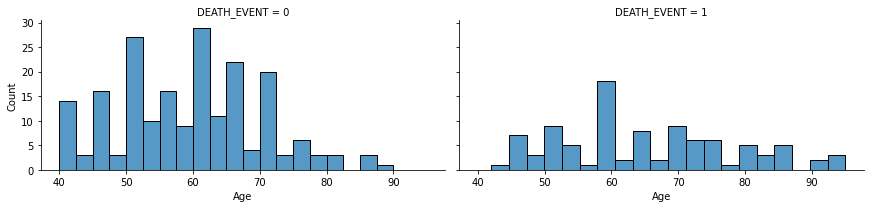

In [17]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'age', bins = 20)
g.set_axis_labels("Age", "Count")


#### Among the dead ones, the number of people dead is significantly large for age around 60 compared to other age groups.

## Anemia vs Death

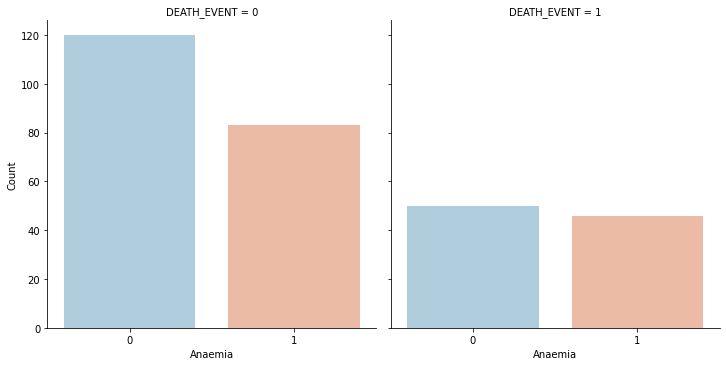

In [18]:
g = sns.catplot(x="anaemia", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Anaemia", "Count")

#### There is not much difference in the number of anemic and non-anemic people who are dead.

## Creatinine Phosphokinase vs Death

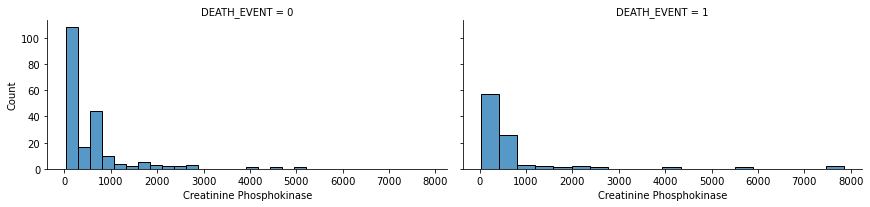

In [19]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'creatinine_phosphokinase', bins = 20)
g.set_axis_labels("Creatinine Phosphokinase", "Count")

#### Almost all poeple had the creatinine phosphokinase level ranging from 0 to 1000 while the maximum value is 7861 which suggests us we have some outliers. The minimum value is 23 and the standard deviation is 970.29.

## Diabetes  vs Death

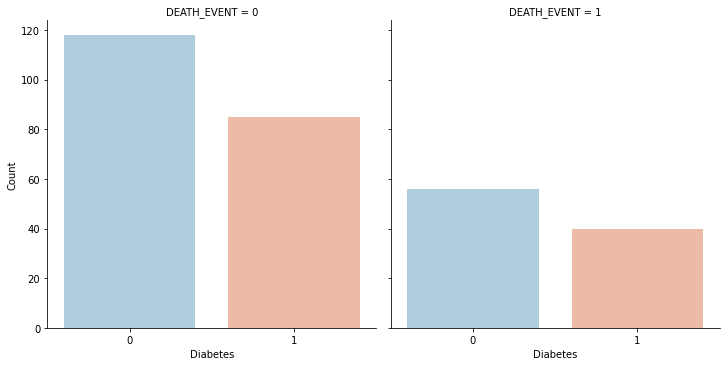

In [20]:
g = sns.catplot(x="diabetes", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Diabetes", "Count")

#### The diabetic and non-diabietic ones tend to have almost same death rates but our sample (dataset) has slightly more non-diabetic people than diabetic ones.

## Ejection Fraction vs Death

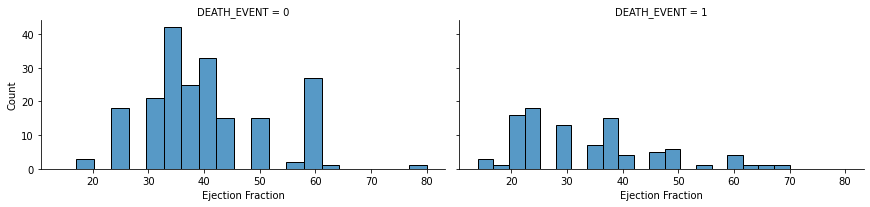

In [21]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'ejection_fraction', bins = 20)
g.set_axis_labels("Ejection Fraction", "Count")

#### The lower ejection factor resulted in death event while the non-dead ones have higher ejection factor.

## High Blood Pressure vs Death

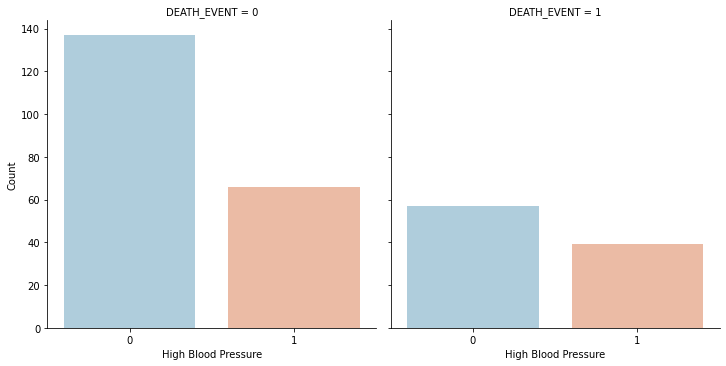

In [22]:
g = sns.catplot(x="high_blood_pressure", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("High Blood Pressure", "Count")

#### Since there is high correlation percentage in dead patients that had high blood pressure, the most poeple with low blood pressure are not dead.

## Platelets vs Death

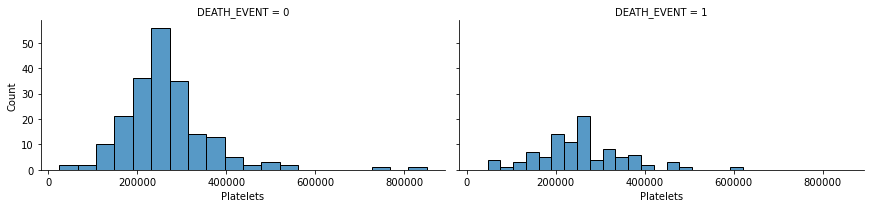

In [23]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'platelets', bins = 20)
g.set_axis_labels("Platelets", "Count")

#### From the dataset, the number of platelets is at the peak around 20000 to 400000. Some poeple had much higher number of platelets b ut that doesn't really determine the death event.

## Serum Creatinine vs Death

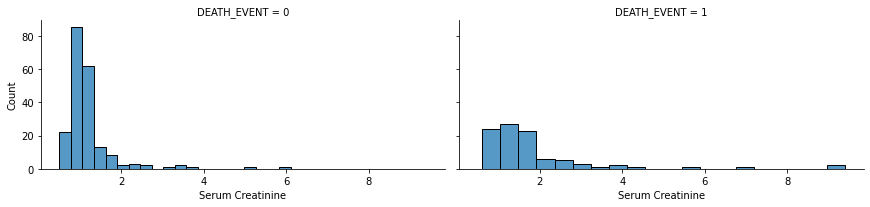

In [24]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'serum_creatinine', bins = 20)
g.set_axis_labels("Serum Creatinine", "Count")

#### The people with higher number of serum creatinine tentatively have less number of deaths than those with the lower number of serum creatinine

## Serum Sodium vs Death

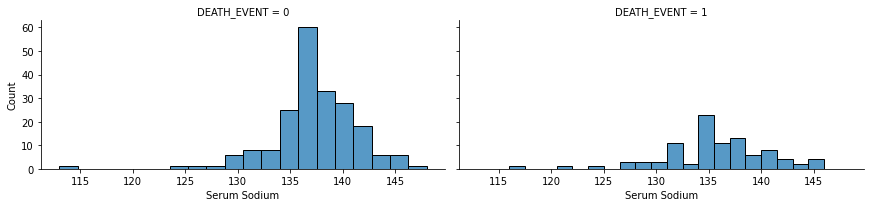

In [25]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'serum_sodium', bins = 20)
g.set_axis_labels("Serum Sodium", "Count")

#### The level of Serum Sodium doesn't really have much effect on the death event. Our sample has the data with serum sodum level mostly close to the range 135-140. The average is 136.63

## Sex vs Death

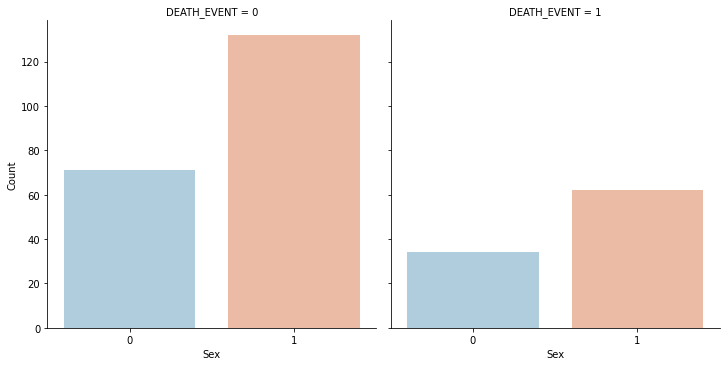

In [26]:
g = sns.catplot(x="sex", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Sex", "Count")

#### The number of males in the dataset is higher than the females, however percentage wise, females have a higher death rate

## Smoking vs Death

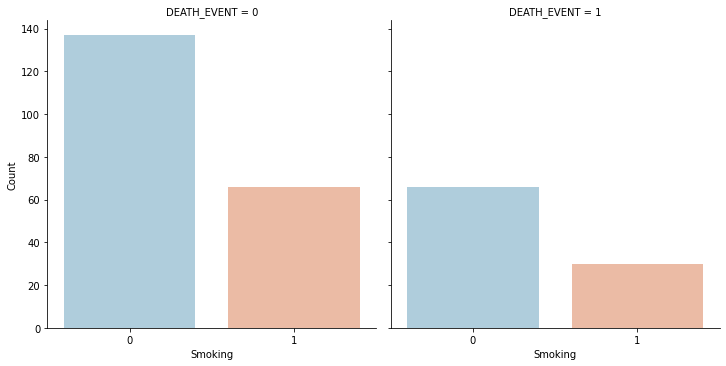

In [27]:
g = sns.catplot(x="smoking", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Smoking", "Count")

#### Although it seems odd, the poeple who don't smoke have a slightly higher death rate those who smoke.

# Holdout method and repeated sampling

In [28]:
clf_1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)


Average: 72.79%


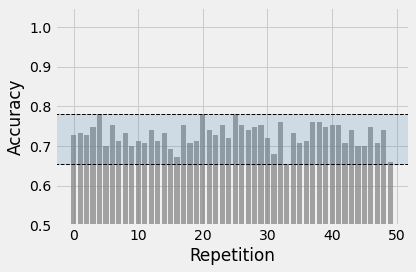

In [29]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]
pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i, stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))
with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.05])
    plt.tight_layout()
    plt.show()


Average: 69.93%


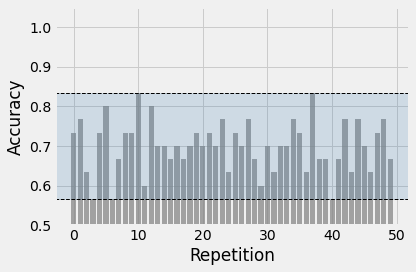

In [30]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]
pred_2 = []
for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.05)
    plt.tight_layout()
    plt.show()


# Pessimistic Bias in Holdout

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify=y)

print('Number of train examples:', y_train.shape[0])
print('Number of test examples:', y_test.shape[0])
print('Labels:', y_train)

Number of train examples: 209
Number of test examples: 90
Labels: 253    0
182    1
274    0
73     0
6      1
      ..
74     1
104    0
173    0
79     0
103    0
Name: DEATH_EVENT, Length: 209, dtype: int64


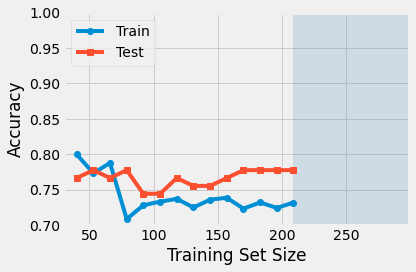

In [32]:




clf_2 = LogisticRegression()

pred_train, pred_test = [], []
intervals = np.arange(40, X_train.shape[0] + 1,13)
#print(intervals)
for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([30, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0],
                X_train.shape[0] + X_test.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.7, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()

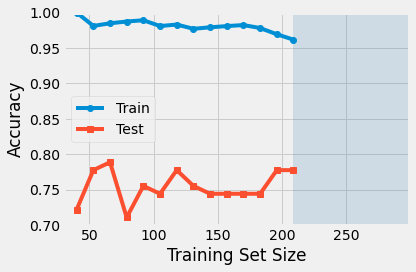

In [33]:

clf_2 = RandomForestClassifier(n_estimators=100, random_state=123)

pred_train, pred_test = [], []
intervals = np.arange(40, X_train.shape[0] + 1,13)

for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([30, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0],
                X_train.shape[0] + X_test.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.7, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()

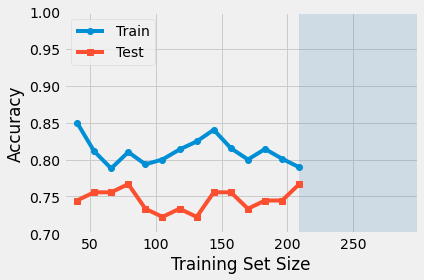

In [34]:
clf_2 = KNeighborsClassifier(n_neighbors=3)
pred_train, pred_test = [], []
intervals = np.arange(40, X_train.shape[0] + 1,13)
for i in intervals:
    clf_2.fit(X_train[:i], y_train[:i])
    p_train = clf_2.score(X_train[:i], y_train[:i])
    p_test = clf_2.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([30, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0],
                X_train.shape[0] + X_test.shape[0],
                alpha=0.2,
                color='steelblue')
plt.ylim([0.7, 1.0])
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.tight_layout()

# Out of Bag Bootstrapping

In [35]:

oob = BootstrapOutOfBag(n_splits=3)
for train, test in oob.split(np.array([1, 2, 3, 4, 5])):
    print(train, test)


[4 1 0 0 3] [2]
[1 2 0 0 1] [3 4]
[1 2 0 1 1] [3 4]


In [36]:


X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium']]
#X = df.drop(['DEATH_EVENT', 'time'], axis=1)
y = df['DEATH_EVENT']

model = DecisionTreeClassifier()

In [37]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('CV scores', cv_scores)
print('Mean CV score', np.mean(cv_scores))
print('CV score Std', np.std(cv_scores))


CV scores [0.55       0.65       0.66666667 0.66666667 0.61016949]
Mean CV score 0.6287005649717514
CV score Std 0.04443803618137489


In [38]:
bootstrap_scores = \
cross_val_score(model, X, y, cv=BootstrapOutOfBag(n_splits=5, random_seed=456))
print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))


Bootstrap scores [0.56190476 0.62068966 0.625      0.66086957 0.68224299]
Mean Bootstrap score 0.6301413945897545
Score Std 0.04106288869310548


In [39]:
bootstrap_scores = \
cross_val_score(model, X, y, cv=BootstrapOutOfBag(n_splits=200, random_seed=456))
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))


Mean Bootstrap score 0.6742609095246156
Score Std 0.03985415363390357


In [40]:
lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))


95% Confidence interval: [59.11, 74.77]


# Data Modeling with Accuracies

In [41]:
X = df[['ejection_fraction', 'serum_creatinine']]
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

accuracies = []

## Random Forest

In [42]:
r_forest = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=42)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred)
accuracies.append(100*forest_accuracy)
print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100*forest_accuracy))

Accuracy of Random Forest Classifier is :  71.11%


<Figure size 432x288 with 0 Axes>

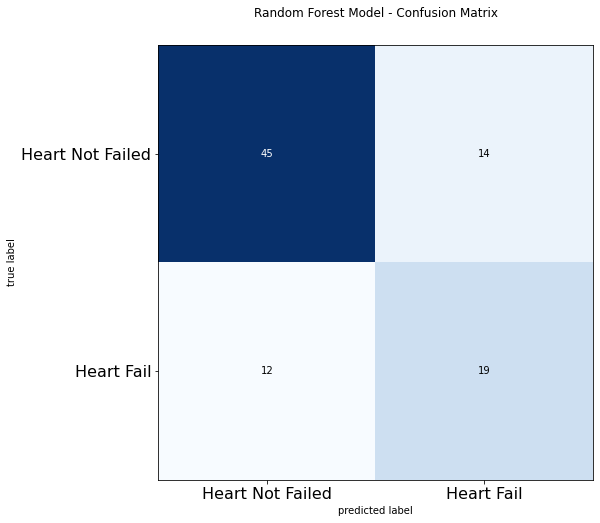

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

## Support Vector Machines w/ Gaussian Kernel

In [44]:

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
accuracies.append(100* svm_accuracy)
print("Accuracy of SVC is : ", "{:.2f}%".format(100* svm_accuracy))

Accuracy of SVC is :  72.22%


<Figure size 432x288 with 0 Axes>

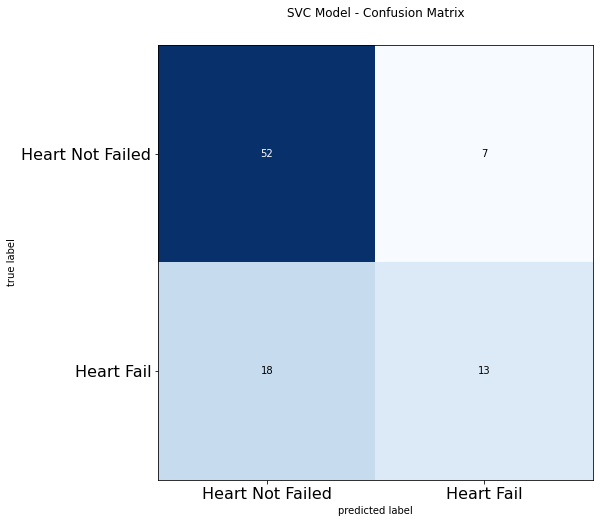

In [45]:

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

## Gradient Boosting

In [46]:

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=42)
gradientboost_clf.fit(X_train,y_train)
y_pred = gradientboost_clf.predict(X_test)
gradientboost_accurracy = accuracy_score(y_test, y_pred)
accuracies.append(100*gradientboost_accurracy)
print("Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_accurracy))
print(accuracies)

Accuracy of Gradient Boosting is :  71.11%
[71.11111111111111, 72.22222222222221, 71.11111111111111]


<Figure size 432x288 with 0 Axes>

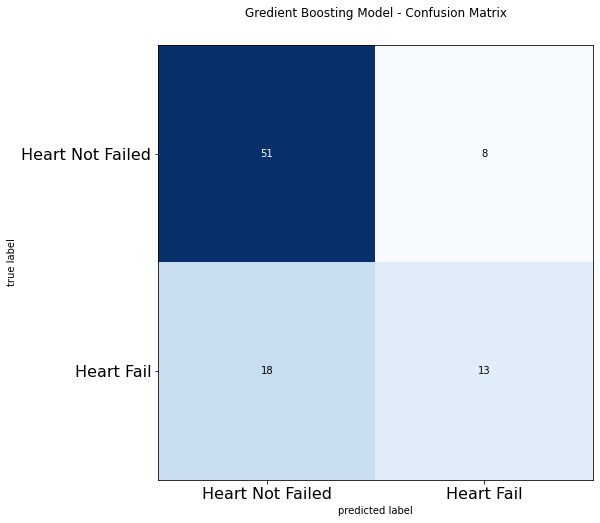

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

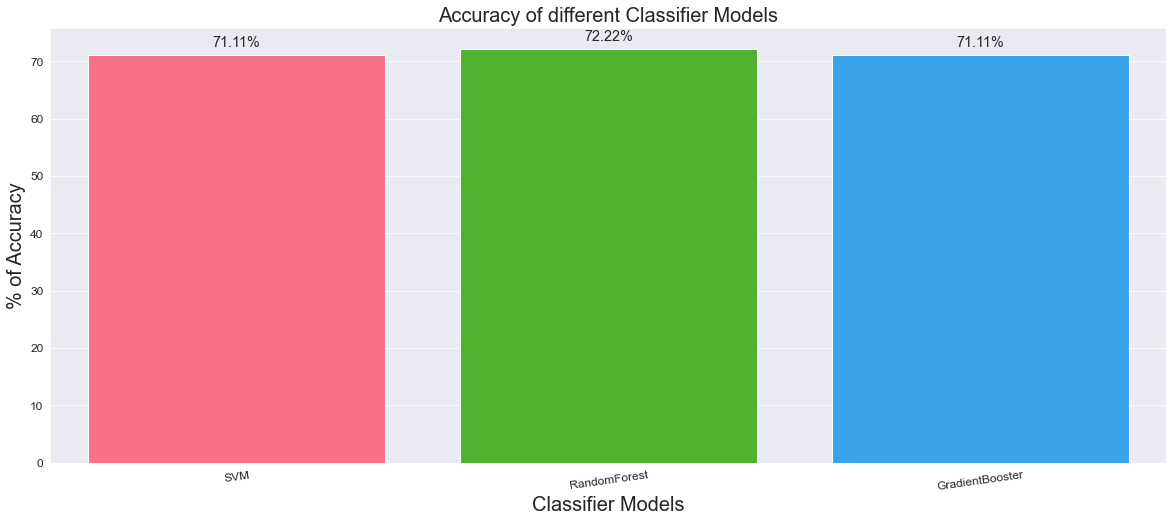

In [49]:
model_list = ['SVM','RandomForest','GradientBooster']
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracies, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Survival Analysis

In [50]:
data = df
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [51]:


kmf = KaplanMeierFitter()

In [52]:
kmf.fit(durations = df["time"], event_observed = df["DEATH_EVENT"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 299 total observations, 203 right-censored observations>

In [53]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,299,299
4.0,1,1,0,0,299
6.0,1,1,0,0,298
7.0,2,2,0,0,297
8.0,2,2,0,0,295
...,...,...,...,...,...
270.0,2,0,2,0,6
271.0,1,0,1,0,4
278.0,1,0,1,0,3


In [54]:
data = data[['age','anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_sodium','sex','smoking','time', 'DEATH_EVENT']]

In [55]:
cph =  CoxPHFitter()
cph.fit(data,"time", event_col = "DEATH_EVENT")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -475.63
         time fit was run = 2020-11-27 23:19:55 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.05       1.05       0.01             0.03             0.07                 1.03                 1.07
anaemia                    0.48       1.62       0.21             0.06             0.90                 1.06                 2.47
creatinine_phosphokinase   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diabetes                  -0.01       0.99       0.22            -0.44             0.42                 0.65                 1.53
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.51       1.66       0.22             0.08             0.93                 1.09                 2.54
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_sodium              -0.06       0.94       0.02            -0.11            -0.02                 0.90                 0.98
sex                       -0.23       0.80       0.25            -0.72             0.26                 0.49                 1.30
smoking                    0.09       1.10       0.25            -0.40             0.58                 0.67                 1.79

                             z      p   -log2(p)
covariate                                       
age                       5.24 <0.005      22.60
anaemia                   2.25   0.02       5.34
creatinine_phosphokinase  1.82   0.07       3.86
diabetes                 -0.03   0.98       0.03
ejection_fraction        -4.42 <0.005      16.61
high_blood_pressure       2.35   0.02       5.74
platelets                -0.66   0.51       0.98
serum_sodium             -2.94 <0.005       8.24
sex                      -0.92   0.36       1.47
smoking                   0.36   0.72       0.48
---
Concordance = 0.72
Partial AIC = 971.27
log-likelihood ratio test = 67.14 on 10 df
-log2(p) of ll-ratio test = 32.57

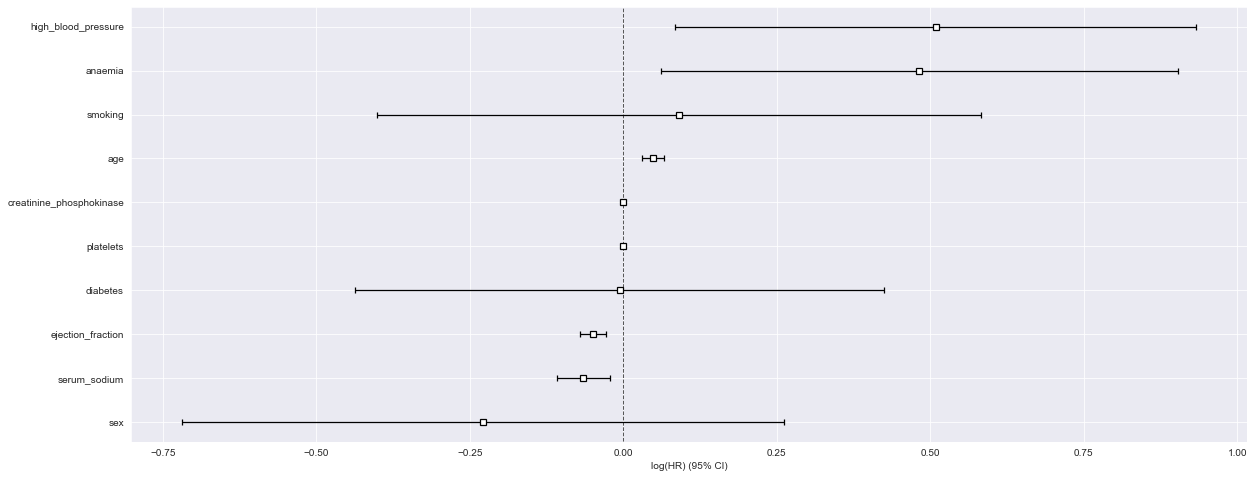

In [56]:
cph.plot()

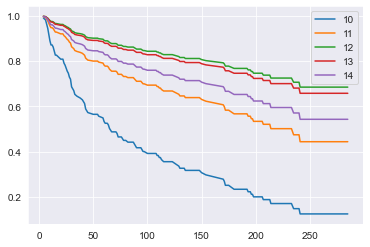

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
d_data = data.iloc[10:15, :]
cph.predict_survival_function(d_data).plot()